All the imports

In [1]:
import pandas as pd
import numpy as np
import polars as pl
from matplotlib import pyplot as plt

In [2]:
path = "./data/"
filtered_metaf = pl.read_csv(path+"filtered_yt_metadata_helper.feather.csv")
filtered_meta = pd.read_csv(path+"filtered_yt_metadata.csv")



C:\Users\leoga\AppData\Local\Temp\ipykernel_13888\1211547938.py:3: DtypeWarning: Columns (4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  filtered_meta = pd.read_csv(path+"filtered_yt_metadata.csv")


In [6]:
#video duration is in seconds
video_length = filtered_metaf['duration']
type(video_length)
numpy_data = video_length.to_numpy()
numpy_data = numpy_data/60/60


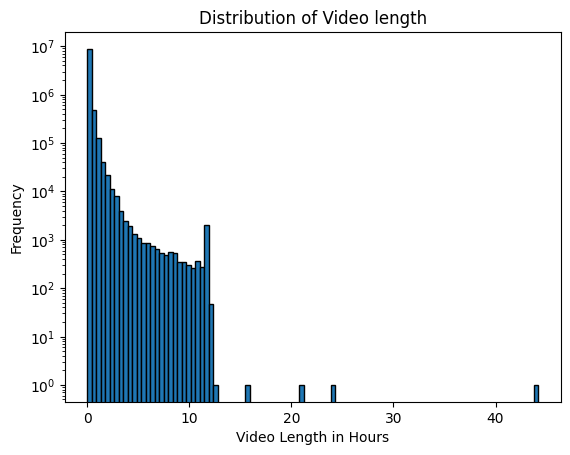

In [8]:
# Plot the histogram using matplotlib
plt.hist(numpy_data, bins= 100,edgecolor='black')  # Specify the number of bins
plt.xlabel('Video Length in Hours')
plt.ylabel('Frequency')
plt.title('Distribution of Video length')
plt.yscale('log')
plt.show()

In [37]:
video_titles = filtered_meta['title']
video_descriptions = filtered_meta['description']

In [36]:
#tried tokenisation from Homework 1
#does not work for here because it uses word pieces and not whole words


In [88]:

# Import necessary functions
import nltk
from nltk.tokenize import word_tokenize
#nltk.download('punkt_tab')
#nltk.download('punkt')

title_token = video_titles.copy(deep=True)


['iJuander', ':', 'Pagkatay', 'sa', 'aso', 'para', 'kainin', ',', 'ginagawa', '...', 'Google', 'Funding', 'CPAC', '?']


In [116]:
sample_title = title_token.sample(3)
print(sample_title)
# sentence = "hello world"
# tokens = word_tokenize(sentence)
# print(tokens)



7046551           Cat got your tongue..or is it Big Brother?
4617808      Williamson County Schools Address School Safety
5007514    Over One Thousand Primary School Classrooms De...
Name: title, dtype: object


In [119]:
title_token= word_tokenize(title_token.to_string(index=False))
title_token= pd.Series(title_token)


C:\Users\leoga\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\leoga\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\leoga\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\leoga\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\leoga\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}

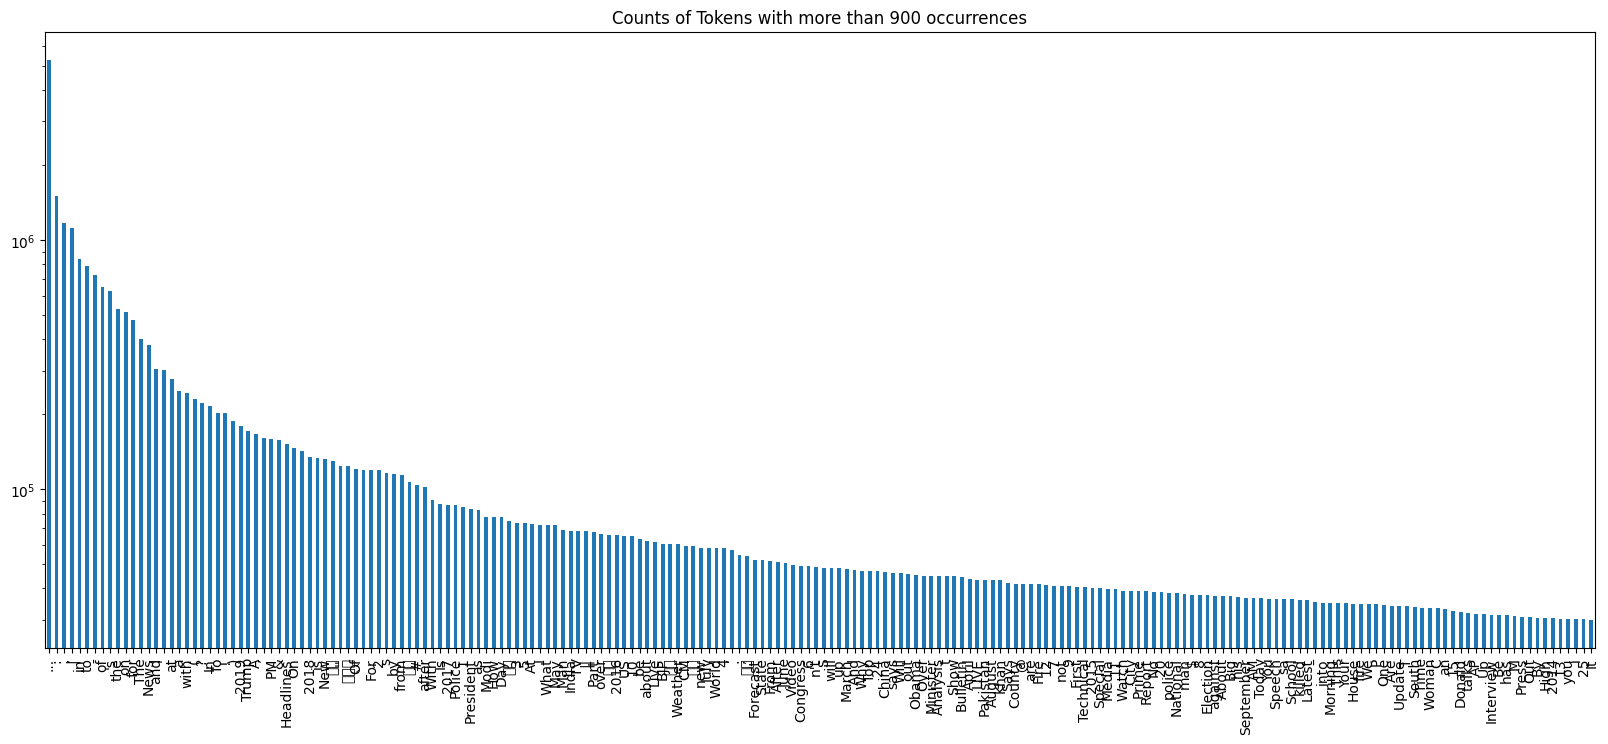

In [125]:
plt.figure()
title_token.value_counts()[title_token.value_counts()>30000].plot(kind='bar', figsize=(20, 8))
plt.yscale('log')
plt.title('Counts of Tokens with more than 900 occurrences')
plt.show()

In [129]:
title_token.value_counts().head(30)

...      5313628
:        1511511
,        1174919
|        1119834
in        838625
to        785420
-         724618
of        648157
's        623560
the       528577
on        515730
for       478540
The       402137
News      380268
and       302893
'         302615
at        276601
a         249099
with      243504
(         231502
?         221620
In        215481
To        202120
!         201912
)         187444
2019      179744
Trump     170745
A         166849
’         161324
PM        159464
Name: count, dtype: int64

' l'

TypeError: argument 'tokens': 'int' object cannot be converted to 'Sequence'